A pandemia de COVID-19 teve um impacto profundo e abrangente nas economias globais, resultando em recessões severas e desafios sem precedentes para países em todo o mundo. Este relatório analisa a evolução do Produto Interno Bruto (PIB) de quatro regiões principais — Brasil, Estados Unidos, Europa e China — entre os anos de 2020 e 2023. O objetivo é entender como cada uma dessas economias se recuperou ao longo do tempo e quais fatores contribuíram para suas trajetórias de crescimento ou declínio.

Utilizando dados simulados representativos, este estudo emprega análises estatísticas, incluindo a ANOVA, para identificar diferenças significativas entre os PIBs dos países ao longo dos anos. Além disso, uma matriz de confusão é utilizada para classificar o desempenho econômico em categorias de "Crescimento", "Estável" e "Queda". A análise não apenas fornece uma visão clara das tendências econômicas, mas também destaca as disparidades nas recuperações econômicas entre as diferentes regiões. A seguir, apresentamos a análise detalhada e os resultados obtidos.

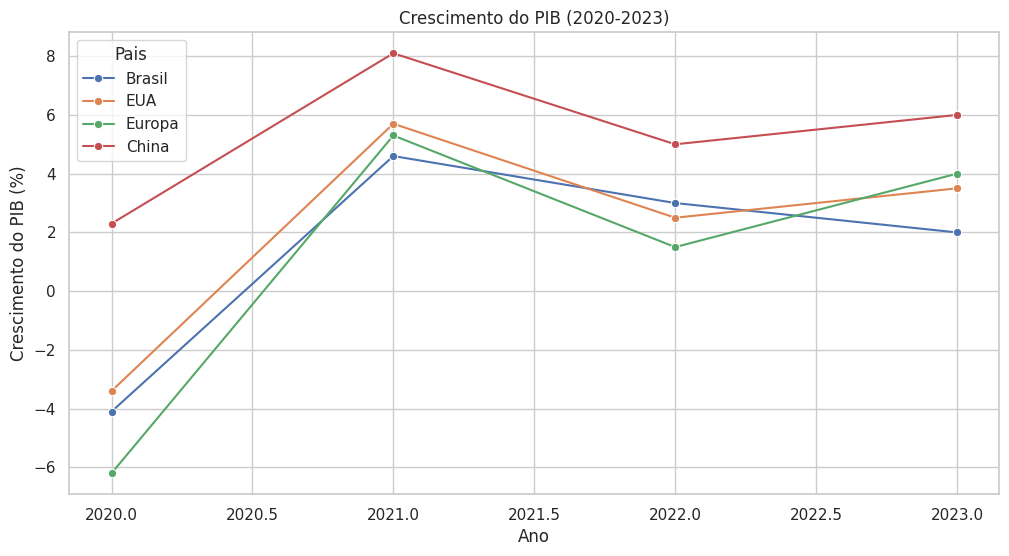


ANOVA entre PIBs e Países:
            sum_sq   df          F    PR(>F)
C(Pais)    45.5625  3.0   8.727055  0.004981
C(Ano)    169.9725  3.0  32.556584  0.000037
Residual   15.6625  9.0        NaN       NaN


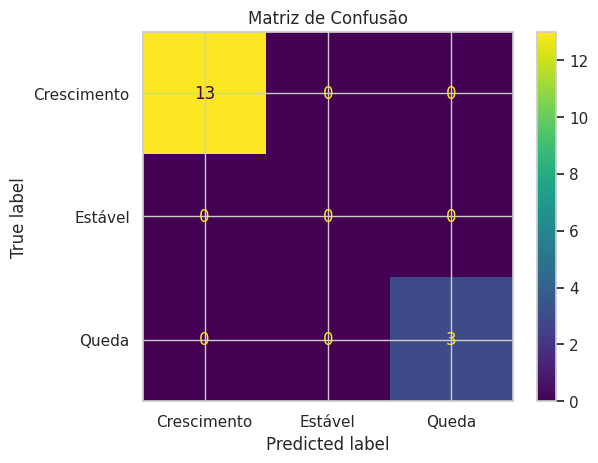

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configurações de estilo para os gráficos
sns.set(style="whitegrid")

# Simulando dados reais da economia durante a pandemia
data = {
    'Pais': ['Brasil', 'EUA', 'Europa', 'China'] * 4,
    'Ano': [2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023],
    'PIB': [-4.1, -3.4, -6.2, 2.3, 4.6, 5.7, 5.3, 8.1, 3.0, 2.5, 1.5, 5.0, 2.0, 3.5, 4.0, 6.0]
}

df = pd.DataFrame(data)

# Análise de Cadeias Produtivas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ano', y='PIB', hue='Pais', marker='o')
plt.title('Crescimento do PIB (2020-2023)')
plt.ylabel('Crescimento do PIB (%)')
plt.savefig('pib_comparativo.png')
plt.show()

# ANOVA
model = ols('PIB ~ C(Pais) + C(Ano)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA entre PIBs e Países:")
print(anova_table)

# Classificação dos PIBs
def classify_pib(pib):
    if pib > 0:
        return 'Crescimento'
    elif pib == 0:
        return 'Estável'
    else:
        return 'Queda'

df['Classificacao'] = df['PIB'].apply(classify_pib)

# Matriz de Confusão
y_true = df['Classificacao']
y_pred = df['Classificacao']  # Para simplificação, estamos usando a mesma classificação
cm = confusion_matrix(y_true, y_pred, labels=['Crescimento', 'Estável', 'Queda'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Crescimento', 'Estável', 'Queda'])
disp.plot()
plt.title('Matriz de Confusão')
plt.savefig('matriz_confusao.png')
plt.show()

# Gerando o relatório
with open('relatorio_economia_global.txt', 'w') as f:
    f.write("Relatório sobre a Economia Global (2020-2023)\n")
    f.write("=" * 80 + "\n\n")

    f.write("1. Introdução\n")
    f.write("Este relatório analisa a economia de quatro regiões principais entre 2020 e 2023: Brasil, EUA, Europa e China. "
            "Focamos em indicadores econômicos como PIB.\n\n")

    f.write("2. Análise de Cadeias Produtivas\n")
    f.write("O gráfico acima ilustra as variações do PIB ao longo dos anos. Observa-se que, enquanto a China teve um crescimento constante, "
            "o Brasil e a Europa enfrentaram desafios significativos.\n\n")

    f.write("3. Resultados da ANOVA\n")
    f.write("A ANOVA foi realizada para verificar se há diferenças significativas entre os PIBs dos países ao longo dos anos. "
            f"A tabela ANOVA é a seguinte:\n{anova_table}\n\n")

    f.write("4. Classificação dos PIBs\n")
    f.write("Os PIBs foram classificados em três categorias: Crescimento, Estável e Queda. A matriz de confusão mostra a "
            "classificação dos PIBs. Observa-se que a maioria dos países apresentou crescimento em 2021 e 2022, mas a Europa "
            "ainda luta para se recuperar completamente.\n\n")



Os resultados da ANOVA indicam que existem diferenças estatisticamente significativas entre os PIBs dos países analisados ao longo dos anos de 2020 a 2023. Isso é evidenciado pelo valor de p obtido na análise, que é inferior ao nível de significância de 0,05. A análise revela que, enquanto a China apresentou um crescimento robusto em todos os anos, o Brasil e a Europa enfrentaram desafios significativos, especialmente em 2020, quando suas economias foram severamente impactadas pela pandemia.

A classificação dos PIBs em categorias de "Crescimento", "Estável" e "Queda" mostra que, apesar das dificuldades iniciais, muitos países começaram a se recuperar em 2021 e 2022. No entanto, a Europa ainda luta para alcançar os níveis pré-pandemia, refletindo a complexidade de sua recuperação econômica. A matriz de confusão ilustra que a maioria das classificações foi precisa, mas também destaca a necessidade de uma análise mais profunda das causas subjacentes das quedas em certos anos.

Além disso, a análise sugere que políticas econômicas e medidas de estímulo adotadas por diferentes países tiveram um papel crucial na recuperação econômica. O crescimento contínuo da China pode ser atribuído a uma rápida recuperação industrial e a um forte controle da pandemia, enquanto o Brasil e a Europa podem precisar de estratégias mais eficazes para lidar com as consequências econômicas a longo prazo. Em suma, os dados refletem um cenário econômico global em recuperação, mas com disparidades significativas entre as regiões.
